In [7]:
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

In [8]:
matplotlib.rcParams["figure.figsize"] = (25, 12)

In [9]:
img = cv.imread("2019-09-02.png")

In [10]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img)

In [13]:
h, w = v.shape

In [16]:
SCOREBAR_WIDTH, SCOREBAR_HEIGHT = 204, 40

In [22]:
pt_scorebar = (int(w / 2 - SCOREBAR_WIDTH / 2), 0)
scorebar = v[pt_scorebar[1]:pt_scorebar[1] + SCOREBAR_HEIGHT, pt_scorebar[0]:pt_scorebar[0] + SCOREBAR_WIDTH]

In [23]:
pt_scorebar

(1178, 0)

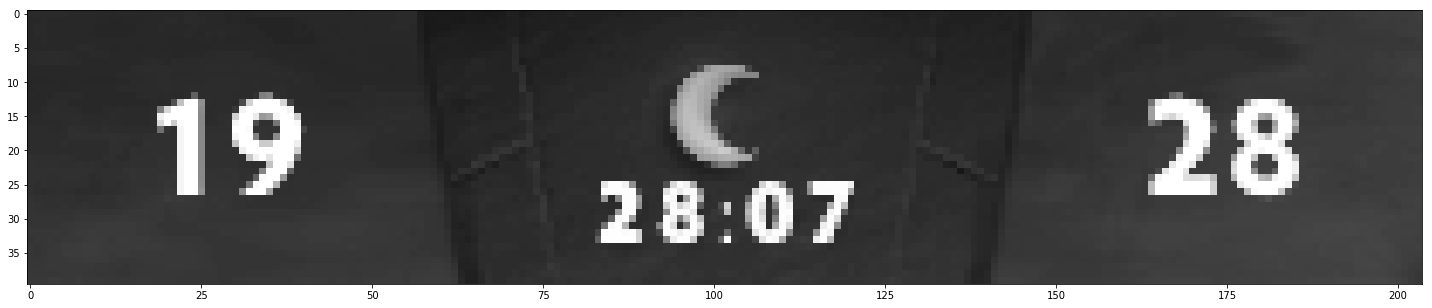

In [24]:
plt.imshow(scorebar, cmap='gray', vmin=0, vmax=255)

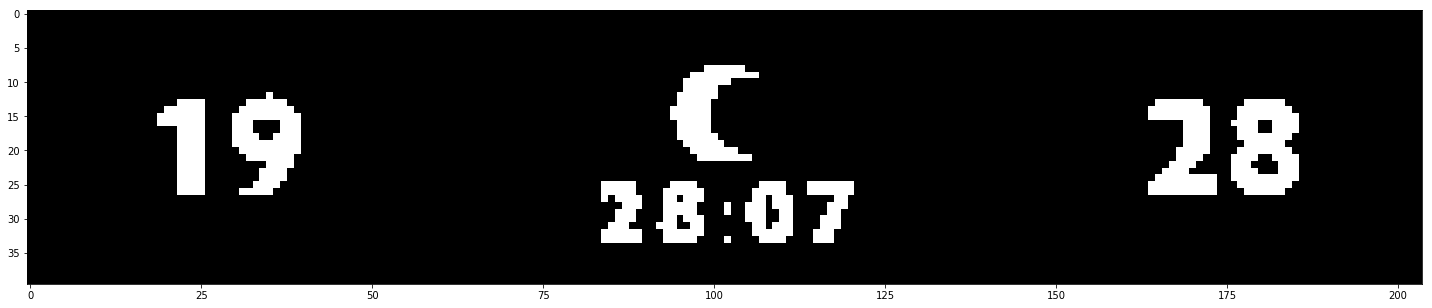

In [36]:
plt.imshow(np.clip(((scorebar.astype(np.int32)-128)*255+128), 0, 255).astype(np.uint8), cmap='gray', vmin=0, vmax=255)

In [79]:
TIME_WIDTH = 56
TIME_HEIGHT = 13
pt_time = (int(SCOREBAR_WIDTH / 2) - int(TIME_WIDTH / 2), pt_scorebar[1] + 23)
time = scorebar[pt_time[1]:pt_time[1]+TIME_HEIGHT,pt_time[0]:pt_time[0]+TIME_WIDTH]

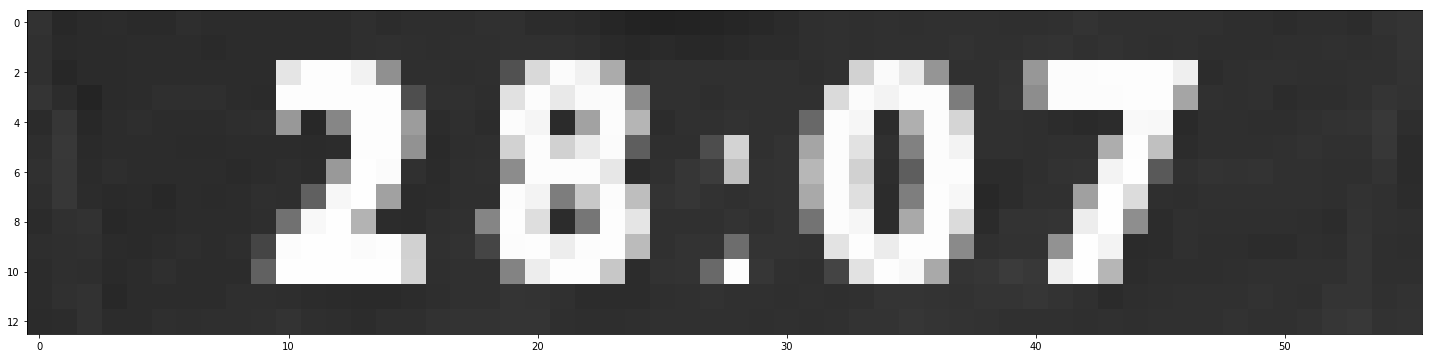

In [80]:
plt.imshow(time, cmap='gray', vmin=0, vmax=255)

In [167]:
time_1 = cv.resize(time, None,fx=4, fy=4, interpolation = cv.INTER_NEAREST)
time_1.shape
time_1_mask = np.clip(((time_1.astype(np.int32)-128)*255+128), 0, 255)

In [171]:
cv.imwrite("time.png", time_1)

False

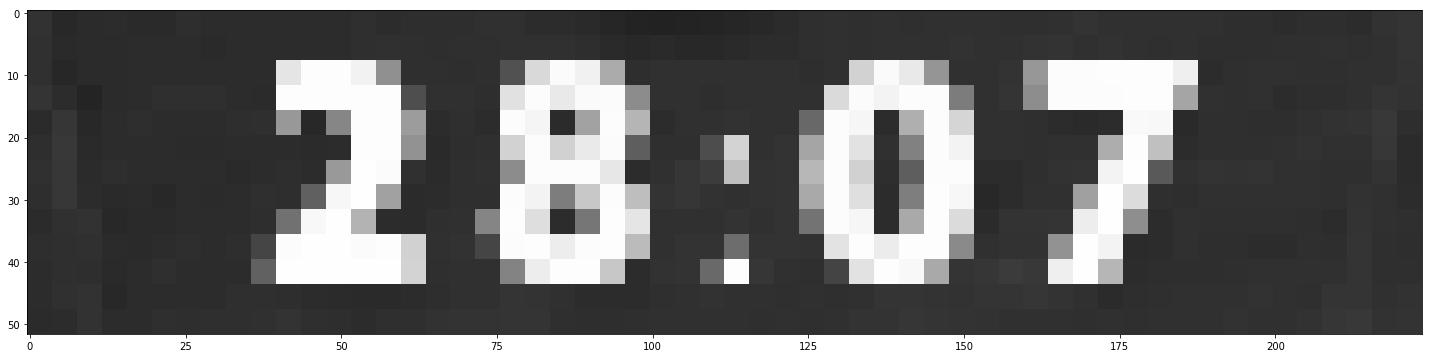

In [118]:
plt.imshow(time_1, cmap='gray', vmin=0, vmax=255)

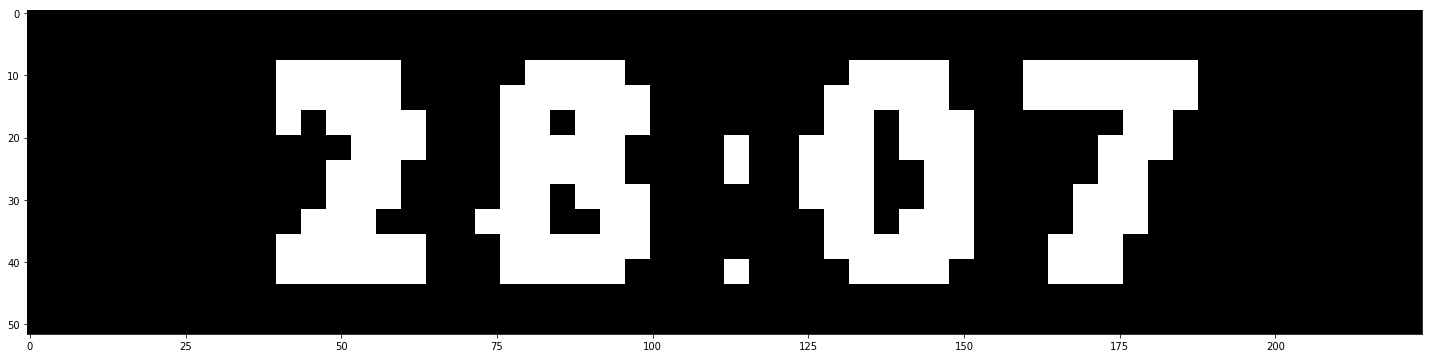

In [119]:
plt.imshow(time_1_mask, cmap='gray', vmin=0, vmax=255)

In [158]:
from PIL import Image
import pytesseract
from matplotlib import cm
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract'

In [165]:
pytesseract.image_to_string(Image.fromarray(time_1_mask), lang="eng")

'13:1”'

''

In [ ]:
plt.imshow(time_1, cmap='gray', vmin=0, vmax=255)